In [ ]:
%pip install -q --no-warn-conflicts malariagen_data
%pip install -q --no-warn-conflicts petl

In [ ]:
import allel
import malariagen_data
import pandas as pd
import numpy as np
import petl as ptl

In [ ]:
# plotting setup
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
import matplotlib_venn as venn
import seaborn as sns
import plotly.express as px
import re

In [ ]:
#Mounting Google Drive
import os
from google.colab import drive
drive.mount("drive")

# make dir
results_dir = "drive/MyDrive/"
os.makedirs(results_dir, exist_ok=True)

Mounted at drive


In [ ]:
## Importing malariagen data set
ag3 = malariagen_data.Ag3("gs://vo_agam_release_master_us_central1/", pre=True)

## Let's check the the sample set
df_samples=ag3.sample_metadata(sample_sets='3.11', sample_query='country=="Burkina Faso"')
sets = list(df_samples.sample_set.unique())

In [ ]:
## define samples cohorts
cohorts, cohorts_, pop_list, pop_list1 = {}, {}, [],[]
for loca in df_samples.location.unique():
    loca_sample = df_samples.query(f"location == '{loca}'")
    for species in loca_sample.aim_species.unique():
      sp_sample=loca_sample.query(f'aim_species=="{species}"')
      key2 = loca[:4]+'_'+species[:3]
      key3 = loca+'[An. '+species+']'
      cohorts_[key2] = f"country == 'Burkina Faso' and location=='{loca}' and aim_species == '{species}'"
      pop_list1.append(key3)
      for year in sp_sample.year.unique():
        key = loca[:4]+'_'+species[:3]+'_'+str(year)
        key1 = loca+'[An. '+species+' ('+ str(year)+')]'
        cohorts[key] = f"country == 'Burkina Faso' and location=='{loca}' and aim_species == '{species}' and year == {year}"
        pop_list1.append(key1)

## Cohorts size
cohorts_size, cohorts_size_ = {}, {}
for coh in cohorts.keys():
  cohorts_size[coh] = df_samples.query(f'{cohorts[coh]}').shape[0]
for coh in cohorts_.keys():
  cohorts_size_[coh] = df_samples.query(f'{cohorts_[coh]}').shape[0]

In [ ]:
#cohorts

## read CNv data

In [ ]:
## read data
coe_cnv_frq = pd.read_csv(f'{results_dir}/sanger_analyses/resistance/CNV/data/coe_cnv_frq.csv')
cyp_cnv_frq = pd.read_csv(f'{results_dir}/sanger_analyses/resistance/CNV/data/cyp_cnv_frq.csv')
gste_cnv_frq = pd.read_csv(f'{results_dir}/sanger_analyses/resistance/CNV/data/gste_cnv_frq.csv')

In [ ]:
df_events_coe = pd.read_csv(f'{results_dir}/sanger_analyses/resistance/CNV/data/df_events_coe.csv')
df_events_gste = pd.read_csv(f'{results_dir}/sanger_analyses/resistance/CNV/data/df_events_gste.csv')
df_events_cyp = pd.read_csv(f'{results_dir}/sanger_analyses/resistance/CNV/data/df_events_cyp.csv')

In [ ]:
#gste_cnv_frq#.columns

In [ ]:
#freq_columns = ['frq_Po-D_ara_2022','frq_Nass_ara_2022','frq_Side_gam_2022',
#                'frq_Po-D_gam_2022','frq_Gama_gam_2022','frq_Naga_gam_2022',
#                'frq_Bana_col_2022', 'frq_Sour_col_2022',  'frq_Po-D_col_2022',
#                'frq_Gama_col_2022', 'frq_Nass_col_2022',  'frq_Naga_col_2022',
#                 'frq_Ouro_col_2022']

#col_lab = ['An. arabiensis (Po-D)', 'An. arabiensis (Nass)', 'An. gambiae ss (Side)',
#           'An. gambiae ss (Po-D)', 'An. gambiae ss (Gama)', 'An. gambiae ss (Naga)',
#           'An. coluzzii (Bana)', 'An. coluzzii (Sour)', 'An. coluzzii (Po-D)',
#           'An. coluzzii (Gama)', 'An. coluzzii (Nass)', 'An. coluzzii (Naga)',
#           'An. coluzzii (Ouro)']
#loc_lab = ['Po-Dongo','Nassan','Sideradougou','Po-Dongo','Gama','Nagare',
#           'Bana','Souroukoudinga','Po-Dongo','Gama','Nassan','Nagare','Ouro-Hesso']

In [ ]:
freq_columns = [
    'frq_Sour_gam_2022','frq_Side_gam_2022','frq_Degu_gam_2022','frq_Po-D_gam_2022',
    'frq_Gama_gam_2022','frq_Naga_gam_2022',
    'frq_Bana_col_2022', 'frq_Sour_col_2022','frq_Side_col_2022','frq_Po-D_col_2022',
    'frq_Gama_col_2022', 'frq_Nass_col_2022', 'frq_Naga_col_2022','frq_Ouro_col_2022',
    'frq_Po-D_ara_2022','frq_Gama_ara_2022','frq_Nass_ara_2022','frq_Ouro_ara_2022'
    ]

col_lab = [
    'Sour (n=16)', 'Side (n=26)','Degu (n=5)', 'Po-D (n=18)', 'Gama (n=27)', 'Naga (n=13)',
    'Bana (n=120)', 'Sour (n=61)','Side (n=10)', 'Po-D (n=20)', 'Gama (n=39)', 'Nass (n=32)', 'Naga (n=100)', 'Ouro (n=61)',
    'Po-D (n=11)', 'Gama (n=13)', 'Nass (n=13)', 'Ouro (n=10)'
    ]

loc_lab = [
    'Sour', 'Side','Degu', 'Po-D', 'Gama', 'Naga',
    'Bana', 'Sour','Side', 'Po-D', 'Gama', 'Nass', 'Naga', 'Ouro',
    'Po-D', 'Gama', 'Nass', 'Ouro'
    ]

In [ ]:
cyp_cnv_frq.columns

Index(['Unnamed: 0', 'gene_id', 'gene_name', 'cnv_type', 'gene_strand',
       'gene_description', 'contig', 'start', 'end', 'frq_Bana_col_2022',
       'frq_Sour_col_2022', 'frq_Sour_gam_2022', 'frq_Nass_col_2022',
       'frq_Nass_ara_2022', 'frq_Side_col_2022', 'frq_Side_gam_2022',
       'frq_Degu_gam_2022', 'frq_Po-D_ara_2022', 'frq_Po-D_gam_2022',
       'frq_Po-D_col_2022', 'frq_Gama_ara_2022', 'frq_Gama_col_2022',
       'frq_Gama_gam_2022', 'frq_Ouro_col_2022', 'frq_Ouro_ara_2022',
       'frq_Naga_gam_2022', 'frq_Naga_col_2022', 'frq_Naga_ara_2022', 'max_af',
       'windows', 'label'],
      dtype='object')

## Statistics

In [ ]:
## CNV coe
print(coe_cnv_frq.cnv_type.value_counts())
print(coe_cnv_frq.shape)
print(coe_cnv_frq.max_af.describe().loc[['min', 'max']])
print('')
print(coe_cnv_frq.groupby(['cnv_type']).max_af.describe()[['min','max']])

cnv_type
amp    26
del     7
Name: count, dtype: int64
(33, 31)
min    0.013699
max    0.849315
Name: max_af, dtype: float64

               min       max
cnv_type                    
amp       0.013699  0.849315
del       0.038462  0.227273


In [ ]:
#df_events_coe

In [ ]:
df_events_coe['cnv_type'] = [i.split(' ')[2] for i in df_events_coe.variant]
#df_events_coe.groupby(['cnv_type', 'taxon', 'area'])['count'].describe()

In [ ]:
#df_events_coe.query('taxon=="coluzzii"')

In [ ]:
#df_events_coe.query('taxon=="coluzzii"').groupby(['cnv_type', 'area'])['count'].value_counts()

In [ ]:
## CNV gste
print(gste_cnv_frq.cnv_type.value_counts())
print(gste_cnv_frq.shape)
print(gste_cnv_frq.max_af.describe().loc[['min', 'max']])
print('')
print(gste_cnv_frq.groupby(['cnv_type']).max_af.describe()[['min','max']])

cnv_type
amp    19
del    14
Name: count, dtype: int64
(33, 31)
min    0.010638
max    1.000000
Name: max_af, dtype: float64

               min       max
cnv_type                    
amp       0.010638  0.555556
del       0.013699  1.000000


In [ ]:
## CNV cyp
print(cyp_cnv_frq.cnv_type.value_counts())
print(cyp_cnv_frq.shape)
print(cyp_cnv_frq.max_af.describe().loc[['min', 'max']])
print('')
print(cyp_cnv_frq.groupby(['cnv_type']).max_af.describe()[['min','max']])

cnv_type
amp    78
del    41
Name: count, dtype: int64
(119, 31)
min    0.010638
max    1.000000
Name: max_af, dtype: float64

               min  max
cnv_type               
amp       0.010638  1.0
del       0.010638  1.0


In [ ]:
#cyp_cnv_frq

# Analysing esterase frequencies

/tmp/ipython-input-3832154028.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


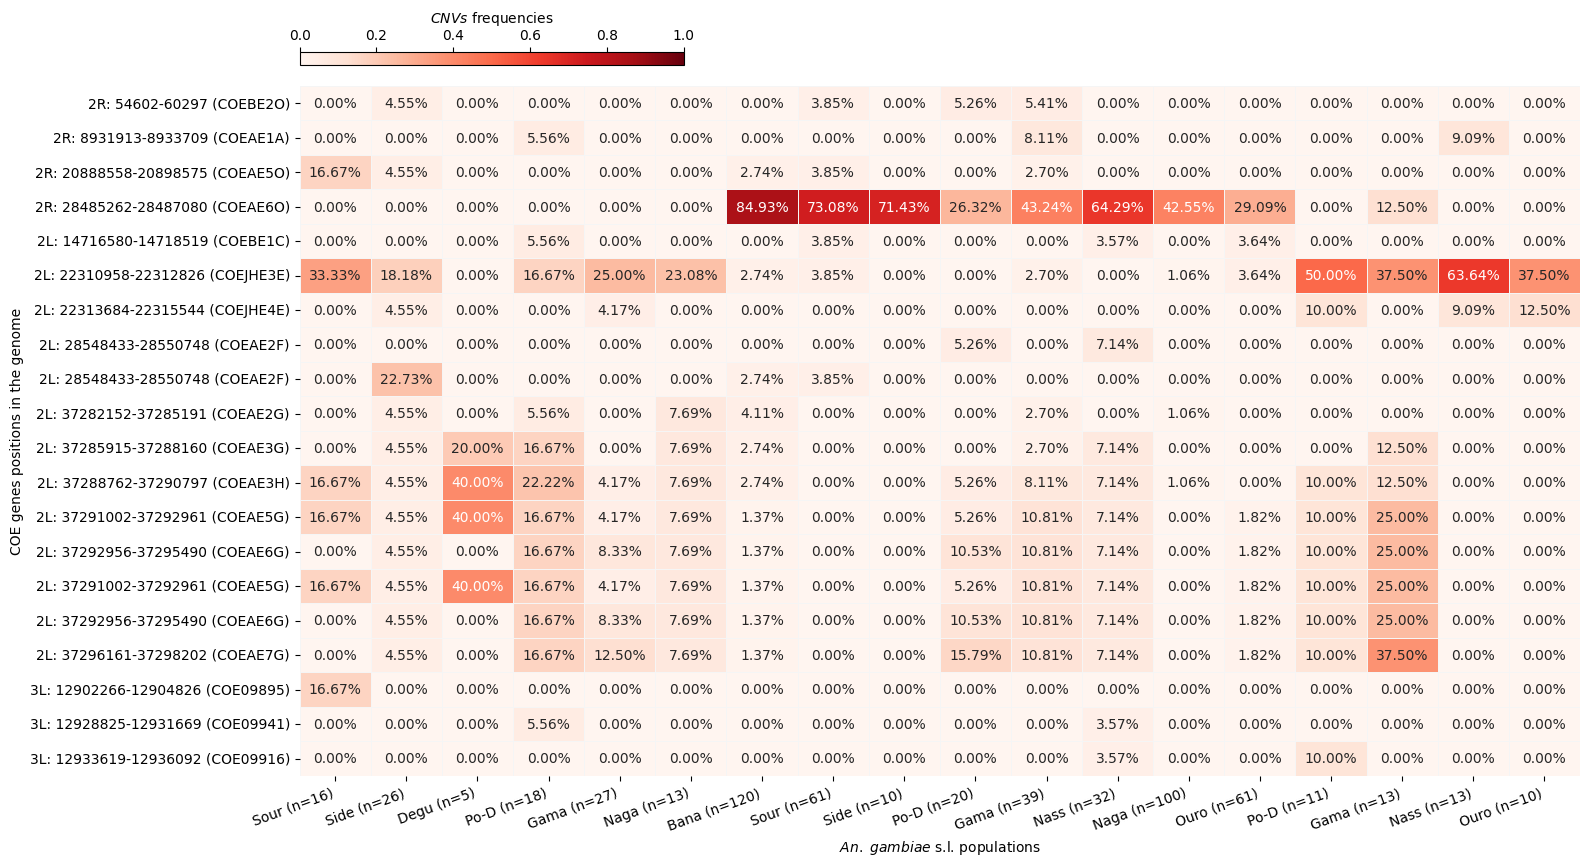

In [ ]:
# plot allele freqs per pop
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize=(16,8))
#sns.set(font_scale = 1)
#Selecting data
select_coe = coe_cnv_frq.query('max_af > 0.05')
ptl_df_coe = ptl.fromdataframe(select_coe)

#set labels
labels = ['%s: %s-%s (%s)' % (rec.contig, rec.start, rec.end, rec.gene_name) for rec in ptl_df_coe.records()]
color_2 = sns.color_palette("Reds", as_cmap=True)

# plot
ax=sns.heatmap(select_coe[freq_columns], vmin=0, vmax=1, fmt='.2%', cmap=color_2, yticklabels=labels,
               xticklabels=col_lab, linewidths=0.5, linecolor="whitesmoke",annot=True, cbar=False)
plt.xticks(rotation=20, ha='right')

ax.set(xlabel="$An.$ $gambiae$ s.l. populations", ylabel = 'COE genes positions in the genome')

cax = inset_axes(ax,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.03, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$CNVs$ frequencies')

fig.tight_layout()


/tmp/ipython-input-160697841.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


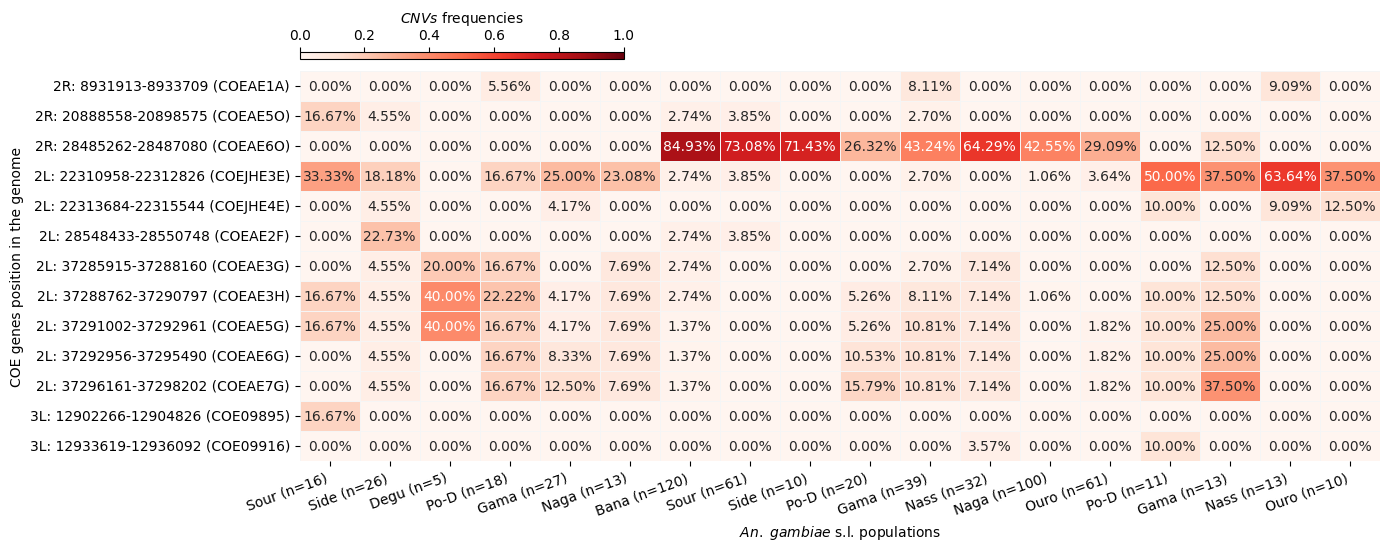

In [ ]:
# plot allele freqs per pop
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize=(14,5))
#sns.set(font_scale = 1)
#Selecting data
select_coe = coe_cnv_frq.query('max_af > 0.08')
select_coe = select_coe.drop_duplicates(subset=['gene_id', 'gene_name', 'cnv_type', 'start', 'end'])
ptl_df_coe = ptl.fromdataframe(select_coe)

#set labels
labels = ['%s: %s-%s (%s)' % (rec.contig, rec.start, rec.end, rec.gene_name) for rec in ptl_df_coe.records()]
color_2 = sns.color_palette("Reds", as_cmap=True)

## xlab and col
col_select = freq_columns.copy()

# plot
ax=sns.heatmap(select_coe[freq_columns], vmin=0, vmax=1, fmt='.2%', cmap=color_2, yticklabels=labels,
               xticklabels=col_lab, linewidths=0.5, linecolor="whitesmoke",annot=True, cbar=False)
plt.xticks(rotation=20, ha='right')

ax.set(xlabel="$An.$ $gambiae$ s.l. populations", ylabel = 'COE genes position in the genome')

cax = inset_axes(ax,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.03, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$CNVs$ frequencies')

fig.tight_layout()

/tmp/ipython-input-2870233603.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


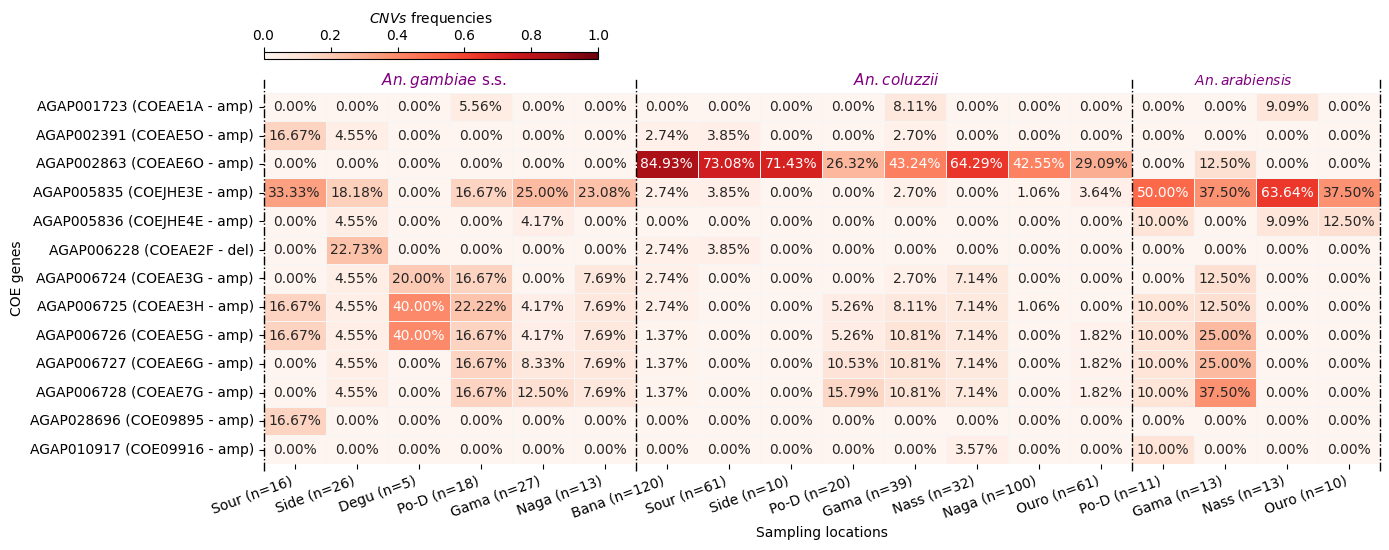

In [ ]:
# plot allele freqs per pop
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize=(14,5))
#sns.set(font_scale = 1)
#Selecting data
select_coe = coe_cnv_frq.query('max_af > 0.08')
select_coe = select_coe.drop_duplicates(subset=['gene_id', 'gene_name', 'cnv_type', 'start', 'end'])
ptl_df_coe = ptl.fromdataframe(select_coe)

#set labels
labels = ['%s (%s - %s)' % (rec.gene_id, rec.gene_name, rec.cnv_type) for rec in ptl_df_coe.records()]
color_2 = sns.color_palette("Reds", as_cmap=True)

## xlab and col
#col_select = freq_columns.copy()
#col_select.remove('frq_BF-09_arab_2015')
#xlab = col_lab.copy()
#xlab.remove('An. arabiensis (2015)')

# plot
ax=sns.heatmap(select_coe[freq_columns], vmin=0, vmax=1, fmt='.2%', cmap=color_2, yticklabels=labels,
               xticklabels=col_lab, linewidths=0.5, linecolor="whitesmoke",annot=True, cbar=False)
plt.xticks(rotation=20, ha='right')

## line to separate samples
plt.axvline(x=0, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=6, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=14, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=18, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)

##Text
plt.text(1.9, -0.3, '$An. gambiae$'+' s.s.', size=11, color='purple')
plt.text(9.5, -0.3, '$An. coluzzii$', size=11, color='purple')
plt.text(15.8, -0.3, '$An. arabiensis$', ha = 'center', size=10, color='purple')

## ax label
ax.set_xlabel("Sampling locations")
ax.set_ylabel('COE genes')

## Legend## Legend
cax = inset_axes(ax,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.09, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$CNVs$ frequencies')

fig.tight_layout()

fig.savefig(f'{results_dir}/sanger_analyses/resistance/CNV/cnv_coe.png', dpi=300, bbox_inches='tight')


#Analysing gste frequencies

/tmp/ipython-input-1219416100.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


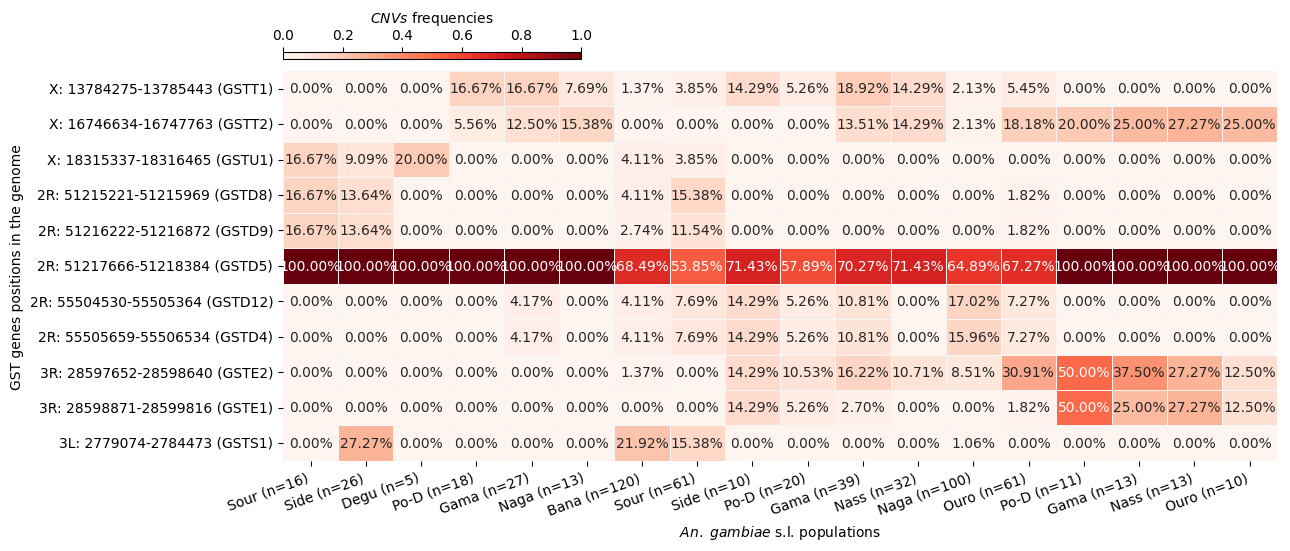

In [ ]:
# plot allele freqs per pop
fig = plt.figure(figsize=(13,5))
#Selecting data
select_gste = gste_cnv_frq.query('max_af > 0.15')
ptl_df_gste = ptl.fromdataframe(select_gste)

#set labels
labels = ['%s: %s-%s (%s)' % (rec.contig, rec.start, rec.end, rec.gene_name) for rec in ptl_df_gste.records()]
color_2 = sns.color_palette("Reds", as_cmap=True)

# plot
ax=sns.heatmap(select_gste[freq_columns], vmin=0, vmax=1, fmt='.2%', cmap=color_2, yticklabels=labels,
               xticklabels=col_lab, linewidths=0.5, linecolor="whitesmoke",annot=True, cbar=False)
plt.xticks(rotation=20, ha='right')

ax.set(xlabel="$An.$ $gambiae$ s.l. populations", ylabel = 'GST genes positions in the genome')

cax = inset_axes(ax,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.03, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$CNVs$ frequencies')

fig.tight_layout()

#save fig


/tmp/ipython-input-3787012482.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


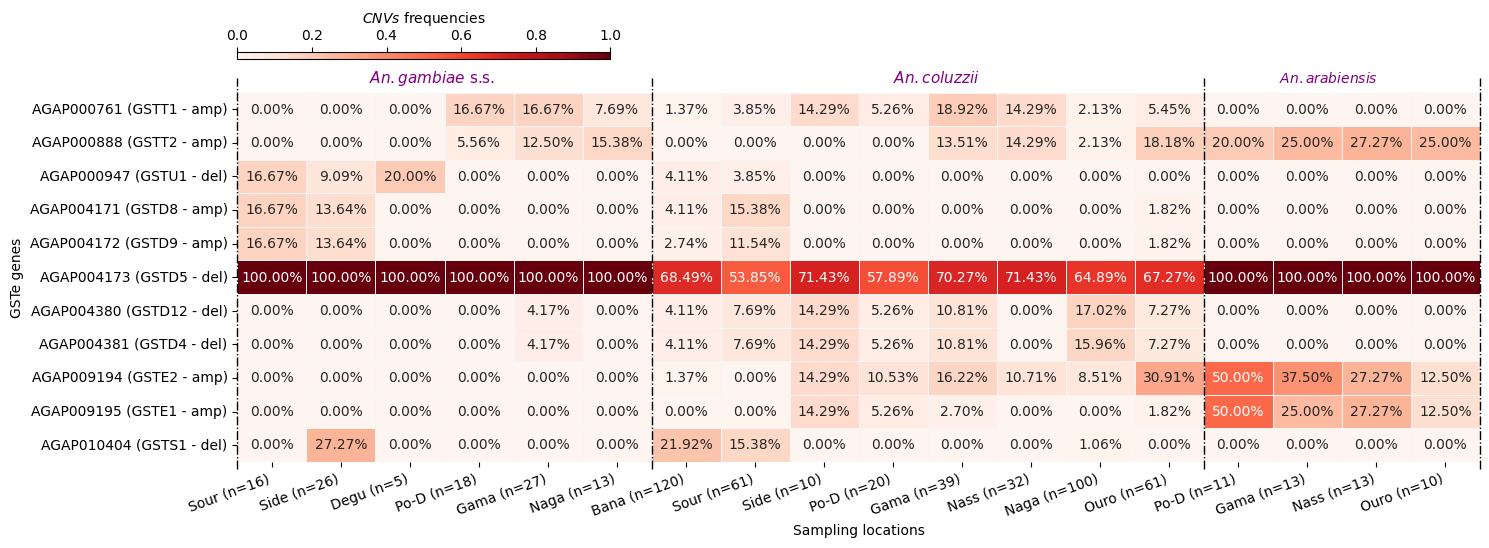

In [ ]:
# plot allele freqs per pop
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize=(15,5))
#sns.set(font_scale = 1)
#Selecting data
select_gste = gste_cnv_frq.query('max_af > 0.15')
select_gste = select_gste.drop_duplicates(subset=['gene_id', 'gene_name', 'cnv_type', 'start', 'end'])
ptl_df_gste = ptl.fromdataframe(select_gste)

#set labels
labels = ['%s (%s - %s)' % (rec.gene_id, rec.gene_name, rec.cnv_type) for rec in ptl_df_gste.records()]
color_2 = sns.color_palette("Reds", as_cmap=True)

## xlab and col
#col_select = freq_columns.copy()
#col_select.remove('frq_BF-09_arab_2015')
#xlab = col_lab.copy()
#xlab.remove('An. arabiensis (2015)')

# plot
ax=sns.heatmap(select_gste[freq_columns], vmin=0, vmax=1, fmt='.2%', cmap=color_2, yticklabels=labels,
               xticklabels=col_lab, linewidths=0.5, linecolor="whitesmoke",annot=True, cbar=False)
plt.xticks(rotation=20, ha='right')

## line to separate samples
plt.axvline(x=0, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=6, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=14, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=18, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)

##Text
plt.text(1.9, -0.3, '$An. gambiae$'+' s.s.', size=11, color='purple')
plt.text(9.5, -0.3, '$An. coluzzii$', size=11, color='purple')
plt.text(15.8, -0.3, '$An. arabiensis$', ha = 'center', size=10, color='purple')

## ax label
ax.set_xlabel("Sampling locations")
ax.set_ylabel('GSTe genes')

## Legend## Legend
cax = inset_axes(ax,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.09, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$CNVs$ frequencies')

fig.tight_layout()

fig.savefig(f'{results_dir}/sanger_analyses/resistance/CNV/cnv_gste.png', dpi=300, bbox_inches='tight')


In [ ]:
#gste_cnv_frq.query('max_af > 0.05')

#Analysing cyp frequencies

In [ ]:
cyp_list = list(cyp_cnv_frq.query('max_af > 0.05').gene_name)
print(len(cyp_list))
#cyp_list

85


In [ ]:
cyp_selected_list = ['CYP9K1', 'CYP6P3','CYP6P3','CYP6P5','CYP6P4','CYP6P1','CYP6P2','CYP6AA1','CYP6AA2','CYP6P15P',
                     'CYP6Z3','CYP6Z2','CYP6Z2','CYP6Z1','CYP9M1','CYP9M1','CYP9M2','CYP6AF1','CYP6AF2','CYP6AF2','CYP12F3','CYP12F2','CYP12F2','CYP12F1',]

cyp_list_sel = ['CYP9K1', 'CYP6P3','CYP6P3','CYP6P5','CYP6P4','CYP6P1','CYP6P2','CYP6AA1','CYP6AA2','CYP6P15P',
                'CYP6Z3','CYP6Z2','CYP6Z2','CYP6Z1','CYP9M1','CYP9M1','CYP9M2','CYP6AF1','CYP6AF2','CYP6AF2','CYP12F3','CYP12F2']

In [ ]:
#cyp_cnv_frq.query(f'gene_name == {cyp_selected_list} and max_af > 0.1')

/tmp/ipython-input-1131359411.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


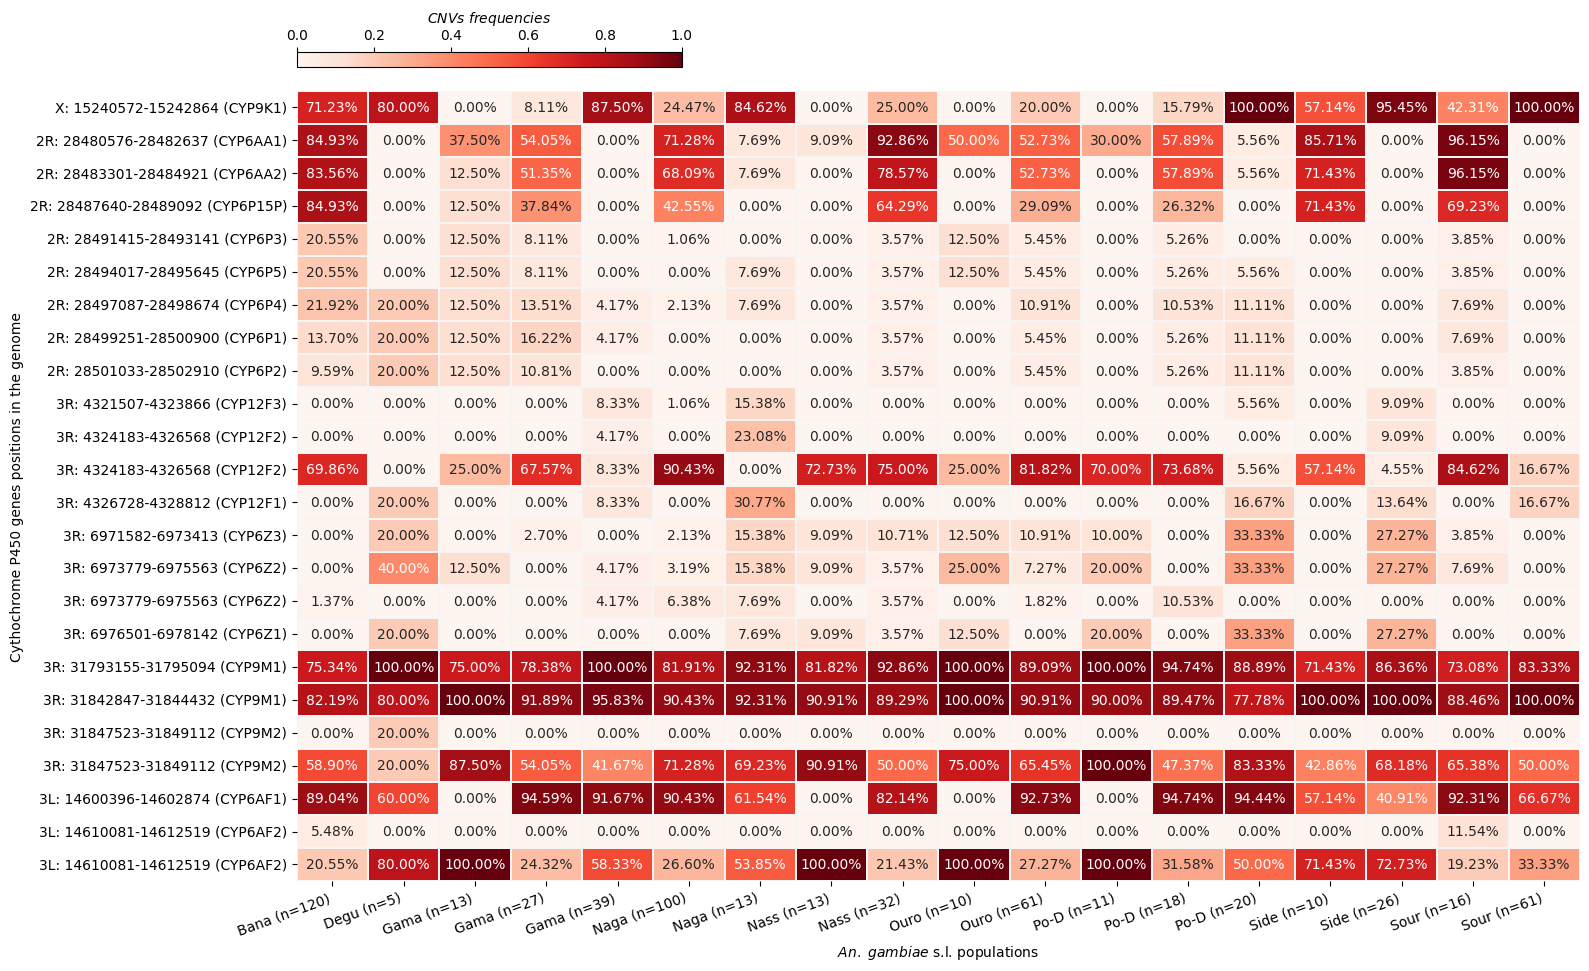

In [ ]:
## Plot allele freqs per pop
fig, ax = plt.subplots(figsize=(16,9))
#sns.set(font_scale = 1)
#Selecting data
select_cyp = cyp_cnv_frq.query(f'gene_name == {cyp_selected_list} and max_af > 0.1')
ptl_df_cyp = ptl.fromdataframe(select_cyp)

#set labels
labels = ['%s: %s-%s (%s)' % (rec.contig, rec.start, rec.end, rec.gene_name) for rec in ptl_df_cyp.records()]
color_2 = sns.color_palette("Reds", as_cmap=True)

# plot
ax=sns.heatmap(select_cyp[sorted(freq_columns)], vmin=0, vmax=1, fmt='.2%', cmap=color_2, yticklabels=labels, linewidths=0.25,
               xticklabels=sorted(col_lab),linecolor="whitesmoke",annot=True, cbar=False)
plt.xticks(rotation=20, ha='right')

ax.set(xlabel="$An.$ $gambiae$ s.l. populations", ylabel = 'Cythochrome P450 genes positions in the genome')

cax = inset_axes(ax,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.03, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$CNVs$ $frequencies$')

fig.tight_layout()


/tmp/ipython-input-3836515363.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


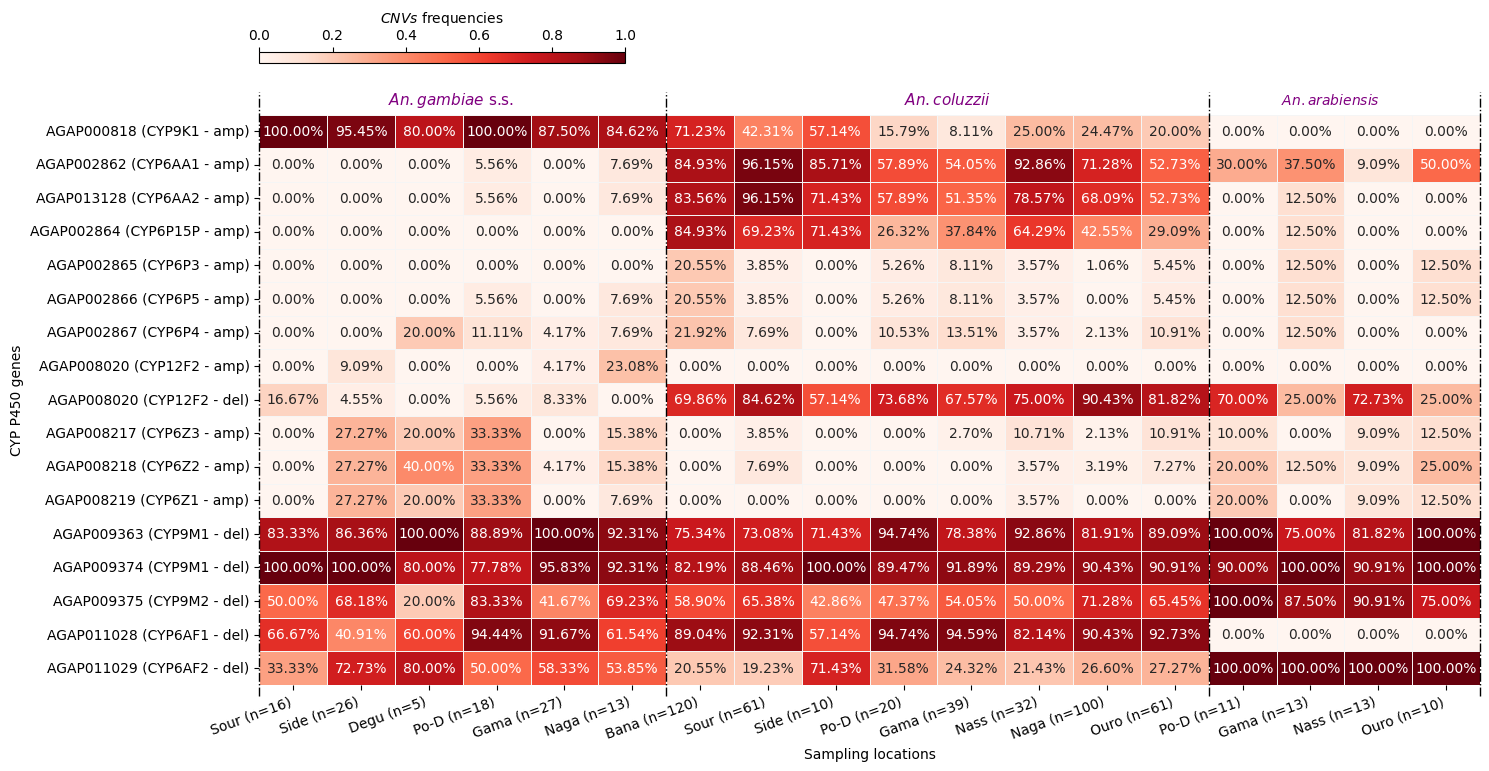

In [ ]:
# plot allele freqs per pop
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize=(15,7))
#sns.set(font_scale = 1)
#Selecting data
select_cyp = select_cyp = cyp_cnv_frq.query(f'gene_name == {cyp_list_sel} and max_af > 0.2')
select_cyp = select_cyp.drop_duplicates(subset=['gene_id', 'gene_name', 'cnv_type', 'start', 'end'])
ptl_df_cyp = ptl.fromdataframe(select_cyp)

#set labels
labels = ['%s (%s - %s)' % (rec.gene_id, rec.gene_name, rec.cnv_type) for rec in ptl_df_cyp.records()]
color_2 = sns.color_palette("Reds", as_cmap=True)

# plot
ax=sns.heatmap(select_cyp[freq_columns], vmin=0, vmax=1, fmt='.2%', cmap=color_2, yticklabels=labels,
               xticklabels=col_lab, linewidths=0.5, linecolor="whitesmoke",annot=True, cbar=False)
plt.xticks(rotation=20, ha='right')

## line to separate samples
plt.axvline(x=0, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=6, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=14, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)
plt.axvline(x=18, ymin=-0.02, ymax=1.04, ls='dashdot',color='k',clip_on=False,lw=1)

##Text
plt.text(1.9, -0.3, '$An. gambiae$'+' s.s.', size=11, color='purple')
plt.text(9.5, -0.3, '$An. coluzzii$', size=11, color='purple')
plt.text(15.8, -0.3, '$An. arabiensis$', ha = 'center', size=10, color='purple')

## ax label
ax.set_xlabel("Sampling locations")
ax.set_ylabel('CYP P450 genes')

## Legend## Legend
cax = inset_axes(ax,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.09, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='$CNVs$ frequencies')

fig.tight_layout()

fig.savefig(f'{results_dir}/sanger_analyses/resistance/CNV/cnv_cyp.png', dpi=300, bbox_inches='tight')